In [12]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

from evaluation.serialization import Serializer

In [14]:
cv_training_metrics = Serializer.load("cv_training_metrics")
cv_final_metrics = Serializer.load("cv_metrics")
final_training_metrics = Serializer.load("final_training_metrics")
final_metrics = Serializer.load("final_metrics")

In [16]:
baseline = pd.read_csv("../data/random_baseline.tsv", sep="\t")
baseline = baseline[baseline["target"] == 'residue_6state'].drop("target", 1)
baseline

C:\Users\juliu\AppData\Local\Temp/ipykernel_32212/3361111628.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline = baseline[baseline["target"] == 'residue_6state'].drop("target", 1)


,kingdom,type,accuracy,precision,recall
50,ARCHAEA,I,0.530296,0.3769230770659341,0.3769230770659341
51,ARCHAEA,L,0.931349,0.03559219430916662,0.03559219430916662
52,ARCHAEA,M,0.844886,0.08473748270290256,0.08473748270290256
53,ARCHAEA,O,0.546813,0.34700854789032043,0.34700854789032043
54,ARCHAEA,S,0.821173,0.0992674019943365,0.0992674019943365
55,ARCHAEA,T,0.893435,0.056471298892928026,0.056471298892928026
56,ARCHAEA,_all_,0.761325,0.16666666714259804,0.16666666714259804
57,EUKARYA,I,0.697438,0.8141956204578944,0.8141956204578944
58,EUKARYA,L,1.000000,None,None
59,EUKARYA,M,0.959043,0.020915947701931264,0.020915947701931264


In [18]:
random_baseline_values = baseline.query("kingdom == '_all_' and type == '_all_'")[["precision", "recall"]].values.astype("float")
random_baseline_values = np.insert(random_baseline_values, 0, 0.)

In [20]:
relevant_data = final_metrics.query("label == 'overall' and kingdom == 'overall'")\
    .groupby("metric")\
    .agg(["mean", "std"])\
    ["value"]

relevant_data["ci"] = 1.96 * relevant_data["std"]

In [21]:
relevant_data

,mean,std,ci
metric,,,
mcc,0.913000,0.004374,0.008573
precision,0.888264,0.006659,0.013052
recall,0.895098,0.005409,0.010601


In [23]:
cv_average_data = cv_final_metrics\
    .query("label == 'overall' and kingdom == 'overall'")\
    .groupby(["metric"])\
    .agg(["mean", "std"])\
    ["value"]

In [24]:
cv_average_data["ci"] = 1.96 * cv_average_data["std"] / 2

In [25]:
cv_average_data

,mean,std,ci
metric,,,
mcc,0.904189,0.004991,0.004891
precision,0.872611,0.008496,0.008326
recall,0.860286,0.014670,0.014376


In [17]:
import matplotlib
matplotlib.rcParams.update({"errorbar.capsize": 8})
from colors import final_color, baseline_color, cv_color

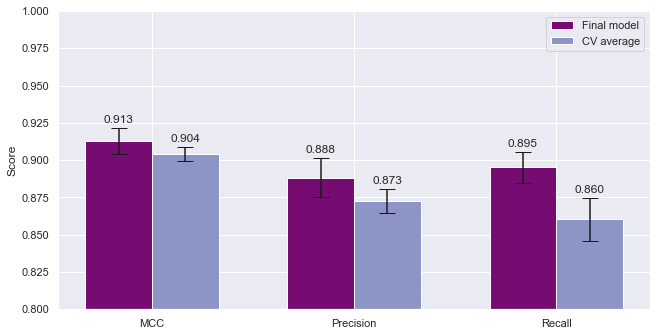

In [18]:
fig, ax = plt.subplots()
labels = ["MCC", "Precision", "Recall"]
width = 0.33
r1 = np.arange(len(labels))
r2 = r1 + width
#r3 = r2 + width

final_model_values = ax.bar(
    r1,
    relevant_data["mean"],
    width,
    yerr = relevant_data["ci"],
    color=final_color,
    label="Final model"
)

cv_values = ax.bar(
    r2,
    cv_average_data["mean"],
    width,
    yerr = cv_average_data["ci"],
    color=cv_color,
    label="CV average"
)

"""
baseline_values = ax.bar(
    r3,
    random_baseline_values,
    width,
    color=baseline_color,
    label="Random baseline"
)
"""

ax.set_ylabel("Score")
ax.set_xticks(r1 + 0.5*width)
ax.set_xticklabels(labels)
ax.legend(loc="upper right")

ax.set_ylim([0.8, 1])

ax.bar_label(final_model_values, padding=3, fmt="%.3f")
ax.bar_label(cv_values, padding=3, fmt="%.3f")
#ax.bar_label(baseline_values, padding=3, fmt="%.3f")

fig.tight_layout()

fig.set_size_inches(10, 5)
fig.savefig("output/overall_performance.png", dpi=300)

In [20]:
relevant_data

,mean,std,ci
metric,,,
mcc,0.913000,0.004374,0.008573
precision,0.888264,0.006659,0.013052
recall,0.895098,0.005409,0.010601


In [21]:
cv_average_data

,mean,std,ci
metric,,,
mcc,0.904189,0.004991,0.004891
precision,0.872611,0.008496,0.008326
recall,0.860286,0.014670,0.014376
